In [1]:
import pandas as pd
import numpy as np
from wordler import *
import os
import matplotlib.pyplot as plt
import pickle as pkl
from english_words import english_words_set

In [2]:
datadir = "../data/maildir/"

ppl = os.listdir(datadir)

In [3]:
#get good filenames
goodPaths = []
for p in ppl:
    try:
        files = os.listdir(datadir + p + "/inbox/")
        goodPaths += [datadir + p + "/inbox/" + x for x in files]
    except:
        pass
print(len(goodPaths)," files found")

41626  files found


In [4]:
data = []
for file in goodPaths:
    try:
        tmp = open(file,"r").readlines()
        data.append(tmp)
    except:
        pass
print(len(data), " files read")

41492  files read


In [5]:
def cleanWord(word):
    return all(x.isalpha() for x in word) and word in english_words_set


def fileReader(file):
    inMessage = False
    inHeader = False
    processed = []
    for x in file:
        tmp = x.rstrip()
        if len(tmp) > 0:
            if tmp[0] == "X":
                inHeader = True
            elif inHeader:
                inMessage = True
            if inMessage:
                processed += [encoder(y) for y in tmp.split() if cleanWord(y)]
    return processed

processedData = []
for x in data:
    processedData += fileReader(x)

print(len(processedData),"total words processed")


5956292 total words processed


In [6]:
uniqueWords = list(set(processedData))
print(len(uniqueWords),"unique words found")

13583 unique words found


In [10]:
#filter to 5 letter words

processedData = [x for x in processedData if len(x) == 5]
uniqueWords = [encoder(x) for x in english_words_set if len(x) == 5 and cleanWord(x)]

print(len(uniqueWords),"unique 5-letter words found")

3194 unique 5-letter words found


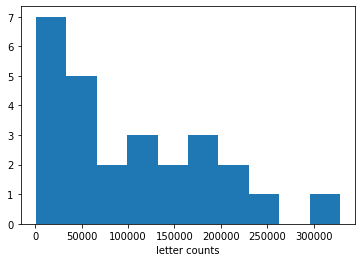

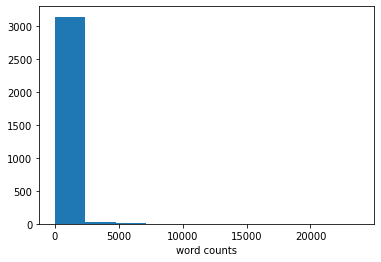

In [11]:
wordCounts = {word:0 for word in uniqueWords}
letterCounts = {l:0 for l in list(ENCODING.values())}

for word in processedData:
    wordCounts[word] += 1
    for letter in word:
        letterCounts[letter] += 1

plt.hist(list(letterCounts.values()))
plt.xlabel("letter counts")
plt.figure()
plt.hist(list(wordCounts.values()))
plt.xlabel("word counts")

wordCounts = {key:value for key,value in wordCounts.items() if value > -1}

In [12]:
print(len(wordCounts),"unique words kept")

3194 unique words kept


In [13]:
pkl.dump([wordCounts,letterCounts],open("../data/model.pkl","wb"))
